In [2]:
import pandas as pd

# Load Trader Data
trader_data = pd.read_csv("/content/trader_data.csv")   # replace with actual file name
print("Trader Data Shape:", trader_data.shape)
print(trader_data.head())

# Load Sentiment Data
sentiment_data = pd.read_csv("/content/fear_greed.csv") # replace with actual file name
print("Sentiment Data Shape:", sentiment_data.shape)
print(sentiment_data.head())


Trader Data Shape: (211224, 16)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Ord

In [10]:
# Check column names & types
print("\nTrader Data Info:")
print(trader_data.info())

print("\nSentiment Data Info:")
print(sentiment_data.info())

# Convert datetime columns
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], errors='coerce')
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], errors='coerce')

# Check missing values
print("\nMissing values in Trader Data:")
print(trader_data.isnull().sum())

print("\nMissing values in Sentiment Data:")
print(sentiment_data.isnull().sum())

# Drop duplicates if any
trader_data.drop_duplicates(inplace=True)
sentiment_data.drop_duplicates(inplace=True)


Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     79225 non-null   datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float

In [13]:
# Convert UNIX timestamp (in milliseconds) to datetime
trader_data['Timestamp'] = pd.to_datetime(trader_data['Timestamp'], unit='ms')

# Drop Timestamp IST since it's mostly missing
trader_data.drop(columns=['Timestamp IST'], inplace=True)

# Extract Date for merging
trader_data['Date'] = trader_data['Timestamp'].dt.date
sentiment_data['Date'] = sentiment_data['date'].dt.date

# Merge with sentiment data
merged_data = pd.merge(
    trader_data,
    sentiment_data[['Date','classification','value']],
    on='Date',
    how='left'
)

print(merged_data.head())
print("Merged shape:", merged_data.shape)


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side  Start Position Direction  Closed PnL  \
0       986.87   7872.16  BUY        0.000000       Buy         0.0   
1        16.00    127.68  BUY      986.524596       Buy         0.0   
2       144.09   1150.63  BUY     1002.518996       Buy         0.0   
3       142.98   1142.04  BUY     1146.558564       Buy         0.0   
4         8.73     69.75  BUY     1289.488521       Buy         0.0   

                                    Transaction Hash     Order ID  Crossed  \
0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706

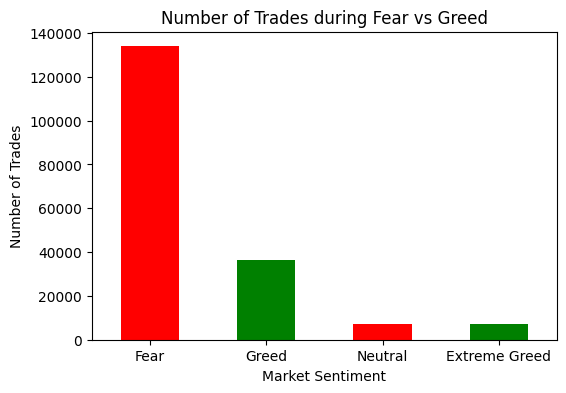

In [14]:
import matplotlib.pyplot as plt

# Count trades in Fear vs Greed
trade_counts = merged_data['classification'].value_counts()

# Plot
plt.figure(figsize=(6,4))
trade_counts.plot(kind='bar', color=['red','green'])
plt.title("Number of Trades during Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=0)
plt.show()


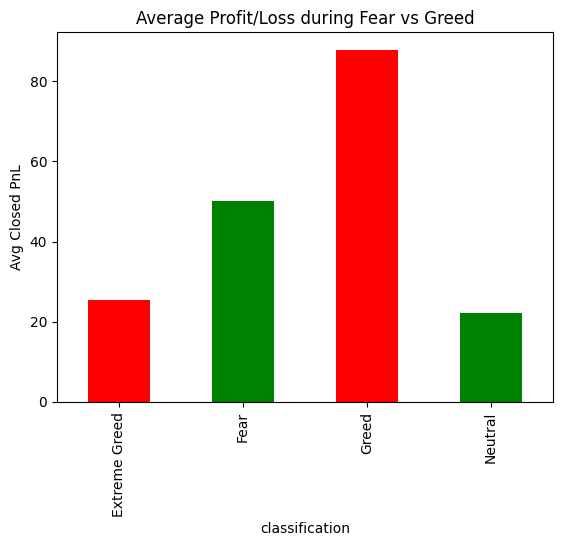

In [15]:
avg_pnl = merged_data.groupby('classification')['Closed PnL'].mean()

avg_pnl.plot(kind='bar', color=['red','green'])
plt.title("Average Profit/Loss during Fear vs Greed")
plt.ylabel("Avg Closed PnL")
plt.show()


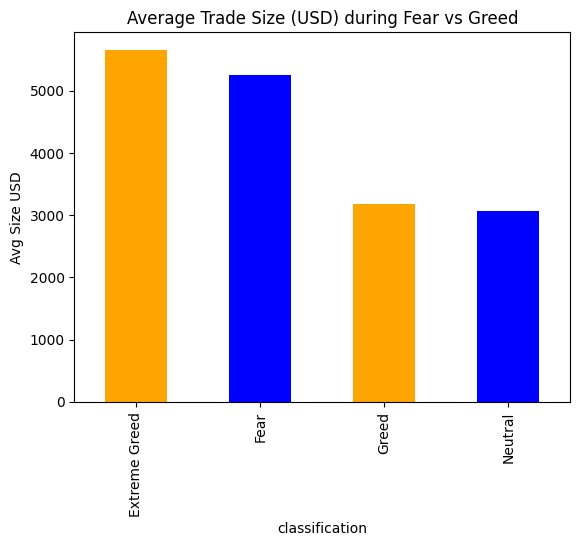

In [16]:
avg_size = merged_data.groupby('classification')['Size USD'].mean()

avg_size.plot(kind='bar', color=['orange','blue'])
plt.title("Average Trade Size (USD) during Fear vs Greed")
plt.ylabel("Avg Size USD")
plt.show()


In [17]:
# ---- PREP: imports and basic checks ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ensure merged_data exists
print("Rows in merged_data:", merged_data.shape[0])
print("Sentiment counts:\n", merged_data['classification'].value_counts())

# helper to save plots
import os
os.makedirs('/content/outputs', exist_ok=True)


Rows in merged_data: 211224
Sentiment counts:
 classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64


In [18]:
def sentiment_summary(df):
    g = df.groupby('classification')
    summary = pd.DataFrame({
        'n_trades': g.size(),
        'total_usd': g['Size USD'].sum(),
        'avg_size_usd': g['Size USD'].mean(),
        'median_size_usd': g['Size USD'].median(),
        'mean_pnl': g['Closed PnL'].mean(),
        'median_pnl': g['Closed PnL'].median(),
        'std_pnl': g['Closed PnL'].std(),
        'win_rate': g.apply(lambda x: (x['Closed PnL']>0).mean()),
        'neg_ratio': g.apply(lambda x: (x['Closed PnL']<0).mean()),
        'pnl_5pct': g['Closed PnL'].quantile(0.05),
        'pnl_95pct': g['Closed PnL'].quantile(0.95)
    })
    return summary

summary = sentiment_summary(merged_data)
summary


/tmp/ipython-input-2579749620.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'win_rate': g.apply(lambda x: (x['Closed PnL']>0).mean()),
/tmp/ipython-input-2579749620.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'neg_ratio': g.apply(lambda x: (x['Closed PnL']<0).mean()),


,n_trades,total_usd,avg_size_usd,median_size_usd,mean_pnl,median_pnl,std_pnl,win_rate,neg_ratio,pnl_5pct,pnl_95pct
classification,,,,,,,,,,,
Extreme Greed,6962,3.940677e+07,5660.265764,1148.635,25.418772,0.0,306.166937,0.490089,0.132146,-7.377942,199.968450
Fear,133871,7.041585e+08,5259.977837,605.070,50.047622,0.0,909.121796,0.415146,0.066930,-1.926570,153.919993
Greed,36289,1.155037e+08,3182.883845,499.940,87.894859,0.0,1148.343968,0.446471,0.079170,-2.631150,276.562000
Neutral,7141,2.184323e+07,3058.848110,554.160,22.229713,0.0,633.704815,0.317182,0.076600,-6.175960,187.819284


In [19]:
# Check if leverage exists
if 'leverage' in merged_data.columns:
    merged_data['leverage_val'] = merged_data['leverage']
else:
    # A proxy: Size USD / (abs(Start Position) + eps) if Start Position looks like position size
    eps = 1e-9
    merged_data['leverage_val'] = merged_data['Size USD'] / (merged_data['Start Position'].abs() + eps)

# Show leverage stats
merged_data.groupby('classification')['leverage_val'].agg(['count','mean','median','std'])


,count,mean,median,std
classification,,,,
Extreme Greed,6962,9.479721e+11,7.051342,5.801521e+12
Fear,133871,1.607094e+11,0.190458,9.001917e+12
Greed,36289,1.403420e+11,0.134906,1.908961e+12
Neutral,7141,1.483750e+11,0.099236,1.915913e+12


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['median'].plot(kind='hist', bins=20, title='median')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='median', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['median'].plot(kind='line', figsize=(8, 4), title='median')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

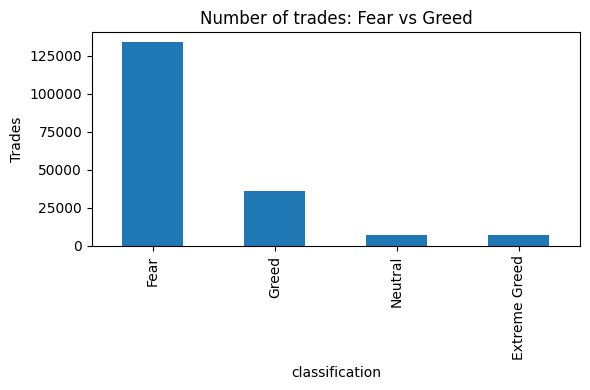

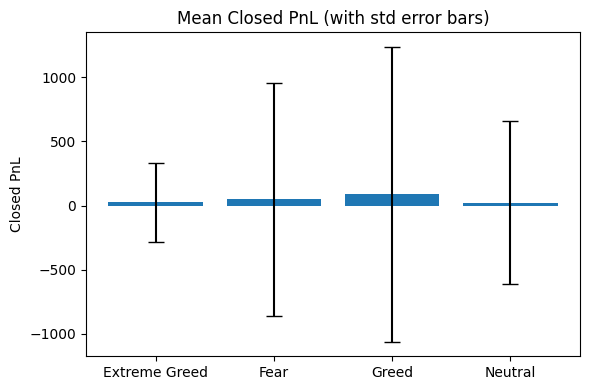

In [20]:
# Bar: number of trades
plt.figure(figsize=(6,4))
merged_data['classification'].value_counts().plot(kind='bar')
plt.title("Number of trades: Fear vs Greed")
plt.ylabel("Trades")
plt.tight_layout()
plt.savefig('/content/outputs/trade_counts_fg.png')
plt.show()

# Mean PnL with error bars (std)
pnl_stats = merged_data.groupby('classification')['Closed PnL'].agg(['mean','std','count'])
plt.figure(figsize=(6,4))
plt.bar(pnl_stats.index, pnl_stats['mean'], yerr=pnl_stats['std'], capsize=6)
plt.title("Mean Closed PnL (with std error bars)")
plt.ylabel("Closed PnL")
plt.tight_layout()
plt.savefig('/content/outputs/mean_pnl_fg.png')
plt.show()


/tmp/ipython-input-3476578589.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  winrate = merged_data.groupby('classification').apply(lambda x: (x['Closed PnL']>0).mean())


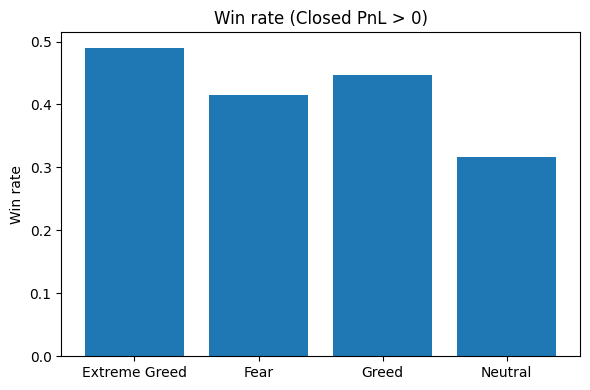

In [21]:
winrate = merged_data.groupby('classification').apply(lambda x: (x['Closed PnL']>0).mean())
plt.figure(figsize=(6,4))
plt.bar(winrate.index, winrate.values)
plt.title("Win rate (Closed PnL > 0)")
plt.ylabel("Win rate")
plt.tight_layout()
plt.savefig('/content/outputs/winrate_fg.png')
plt.show()


In [22]:
# remove infinities and NaN
tmp = merged_data[['leverage_val','Closed PnL','classification']].replace([np.inf,-np.inf],np.nan).dropna()
corr_all = tmp['leverage_val'].corr(tmp['Closed PnL'])
corr_by_sent = tmp.groupby('classification').apply(lambda x: x['leverage_val'].corr(x['Closed PnL']))

print("Overall corr(leverage, pnl):", corr_all)
print("Corr by sentiment:\n", corr_by_sent)


Overall corr(leverage, pnl): -0.0014085440521868877
Corr by sentiment:
 classification
Extreme Greed   -0.013568
Fear            -0.000983
Greed           -0.005627
Neutral         -0.002717
dtype: float64


/tmp/ipython-input-2200515050.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_sent = tmp.groupby('classification').apply(lambda x: x['leverage_val'].corr(x['Closed PnL']))


In [23]:
fear_pnl = merged_data.loc[merged_data['classification']=='Fear', 'Closed PnL'].dropna()
greed_pnl = merged_data.loc[merged_data['classification']=='Greed', 'Closed PnL'].dropna()

# Use t-test (two-sided) and Mann-Whitney (non-parametric)
tstat, tp = stats.ttest_ind(fear_pnl, greed_pnl, equal_var=False, nan_policy='omit')
mw_stat, mw_p = stats.mannwhitneyu(fear_pnl.sample(min(len(fear_pnl),10000), random_state=1),
                                  greed_pnl.sample(min(len(greed_pnl),10000), random_state=1),
                                  alternative='two-sided')

print("t-test: stat, p =", tstat, tp)
print("Mann-Whitney (sampled): stat, p =", mw_stat, mw_p)


t-test: stat, p = -5.804644944972441 6.489683964771416e-09
Mann-Whitney (sampled): stat, p = 48666700.0 0.0004829457493892197


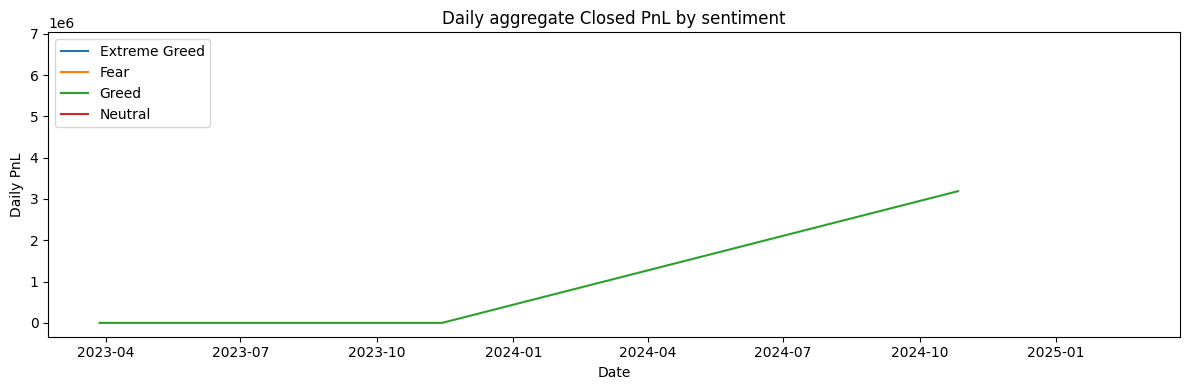

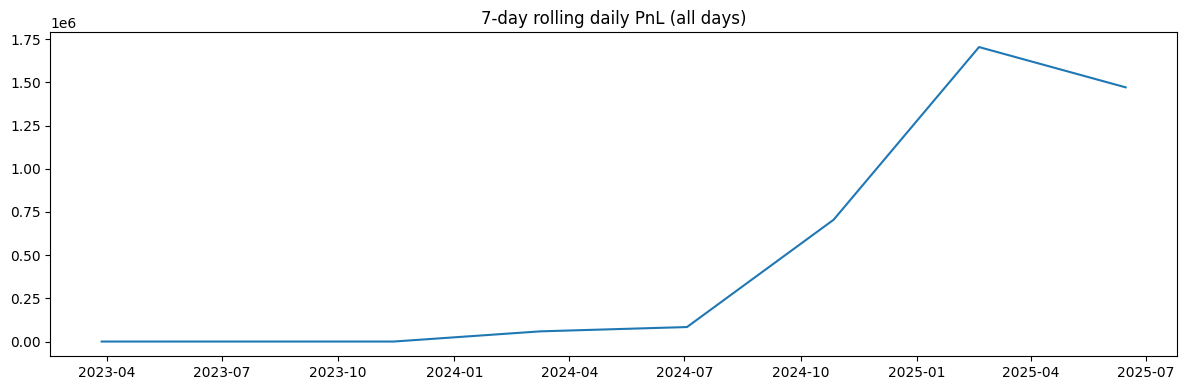

In [24]:
# daily aggregates
daily = merged_data.groupby('Date').agg({
    'Closed PnL':'sum',
    'Size USD':'sum'
}).rename(columns={'Closed PnL':'daily_pnl','Size USD':'daily_vol'}).reset_index()

# attach daily sentiment (majority classification per day or the provided one)
# The sentiment_data file already has one classification per day, so merge that in:
daily = pd.merge(daily, sentiment_data[['Date','classification','value']].drop_duplicates('Date'), on='Date', how='left')

# Plot daily pnl colored by sentiment
plt.figure(figsize=(12,4))
for cls, group in daily.groupby('classification'):
    plt.plot(group['Date'], group['daily_pnl'], label=cls)
plt.legend()
plt.title("Daily aggregate Closed PnL by sentiment")
plt.xlabel("Date")
plt.ylabel("Daily PnL")
plt.tight_layout()
plt.savefig('/content/outputs/daily_pnl_by_sentiment.png')
plt.show()

# Rolling mean
daily['rolling_pnl_7d'] = daily['daily_pnl'].rolling(7, min_periods=1).mean()
plt.figure(figsize=(12,4))
plt.plot(daily['Date'], daily['rolling_pnl_7d'])
plt.title("7-day rolling daily PnL (all days)")
plt.tight_layout()
plt.savefig('/content/outputs/rolling_pnl_7d.png')
plt.show()


In [30]:
# Save CSVs to the local csv_files folder
summary.to_csv(r'C:\Users\ADARSH R G\Desktop\ds_adarsh\csv_files\sentiment_summary.csv')
daily.to_csv(r'C:\Users\ADARSH R G\Desktop\ds_adarsh\csv_files\daily_summary.csv', index=False)

print("Saved summary CSVs to csv_files/")

# Example: if you save plots to outputs/
# plt.savefig('outputs/some_plot.png')


Saved summary CSVs to csv_files/


In [35]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [39]:
import os

# Create a folder in Colab
os.makedirs('csv_files', exist_ok=True)

# Save your CSVs into this folder
summary.to_csv('csv_files/sentiment_summary.csv', index=False)
daily.to_csv('csv_files/daily_summary.csv', index=False)

print("✅ CSVs saved in Colab folder csv_files/")


✅ CSVs saved in Colab folder csv_files/


In [40]:
import shutil

shutil.make_archive('csv_files', 'zip', 'csv_files')  # Creates csv_files.zip
print("✅ csv_files.zip created!")


✅ csv_files.zip created!


In [41]:
from google.colab import files

files.download('csv_files.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>